<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Music_Popularity_Prediction_with_python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
spotify_data=pd.read_csv('spotify.csv')

In [ ]:
print(spotify_data)

        acousticness                    artists  danceability  duration_ms  \
0           0.991000            ['Mamie Smith']         0.598       168333   
1           0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   
2           0.993000            ['Mamie Smith']         0.647       163827   
3           0.000173        ['Oscar Velazquez']         0.730       422087   
4           0.295000                   ['Mixe']         0.704       165224   
...              ...                        ...           ...          ...   
115691      0.889000       ['Barbra Streisand']         0.236       188973   
115692      0.847000          ['Merle Haggard']         0.806       146267   
115693      0.583000        ['Sammy Davis Jr.']         0.692       128560   
115694      0.732000            ['Ray Conniff']         0.639       118667   
115695      0.000797            ['The Animals']         0.573       186333   

        energy  explicit                      id  instrumentaln

In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115696 entries, 0 to 115695
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      115696 non-null  float64
 1   artists           115696 non-null  object 
 2   danceability      115696 non-null  float64
 3   duration_ms       115696 non-null  int64  
 4   energy            115696 non-null  float64
 5   explicit          115696 non-null  int64  
 6   id                115696 non-null  object 
 7   instrumentalness  115696 non-null  float64
 8   key               115696 non-null  int64  
 9   liveness          115696 non-null  float64
 10  loudness          115696 non-null  float64
 11  mode              115696 non-null  int64  
 12  name              115696 non-null  object 
 13  popularity        115696 non-null  int64  
 14  release_date      115696 non-null  object 
 15  speechiness       115695 non-null  float64
 16  tempo             11

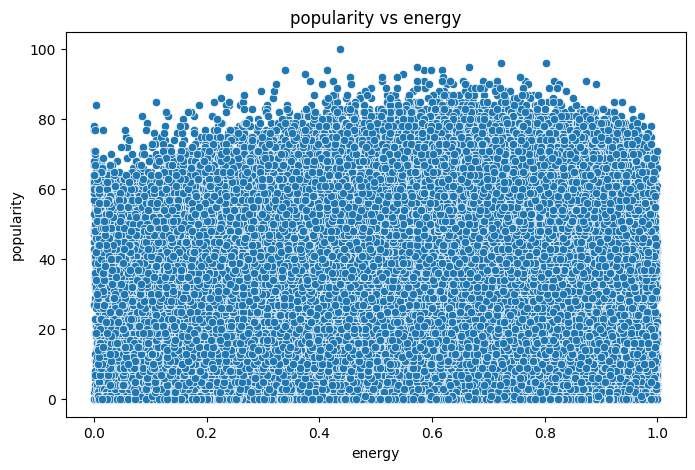

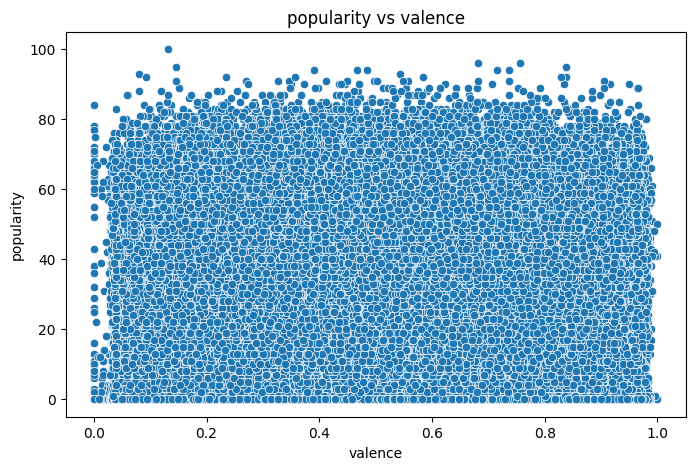

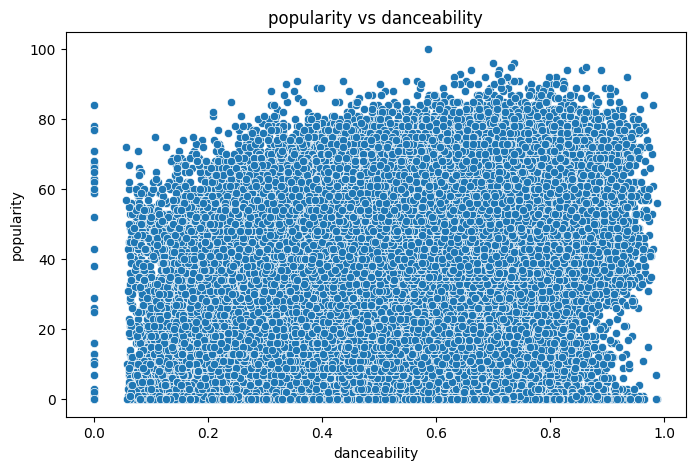

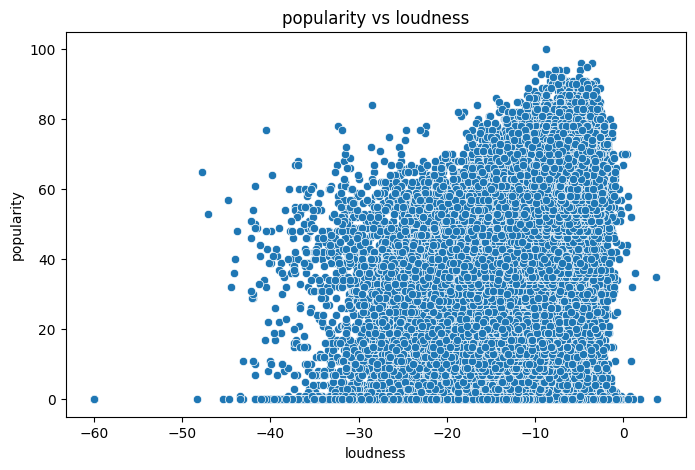

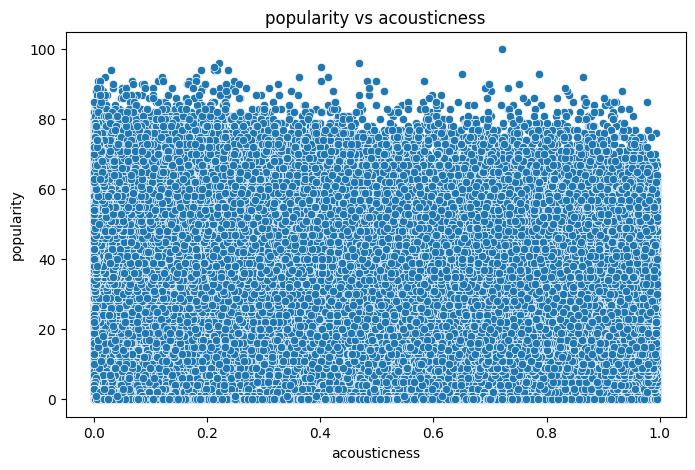

In [ ]:
import matplotlib .pyplot as plt
import seaborn as sns
features = ['energy','valence','danceability','loudness','acousticness']
for feature in features:
  plt.figure(figsize=(8,5))
  sns.scatterplot(data=spotify_data,x=feature,y='popularity')
  plt.title(f'popularity vs {feature}')
  plt.show()

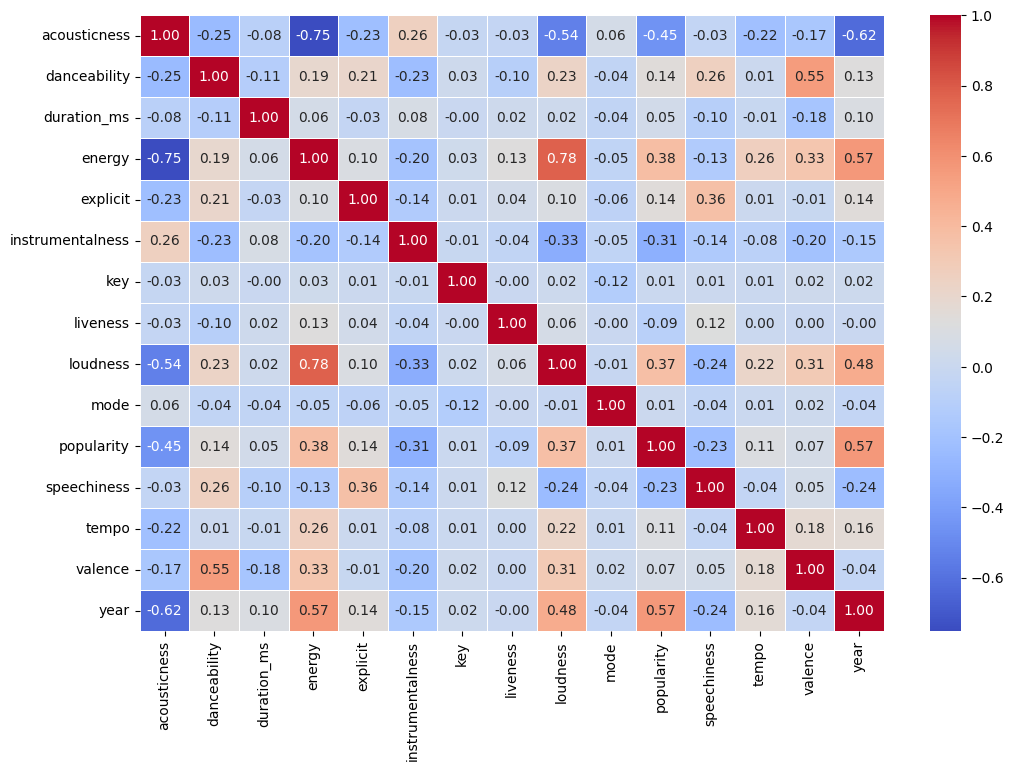

In [ ]:
numeric_columns =spotify_data.select_dtypes(include=['float64','int64']).columns
numeric_data=spotify_data[numeric_columns]
corr_matrix= numeric_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()

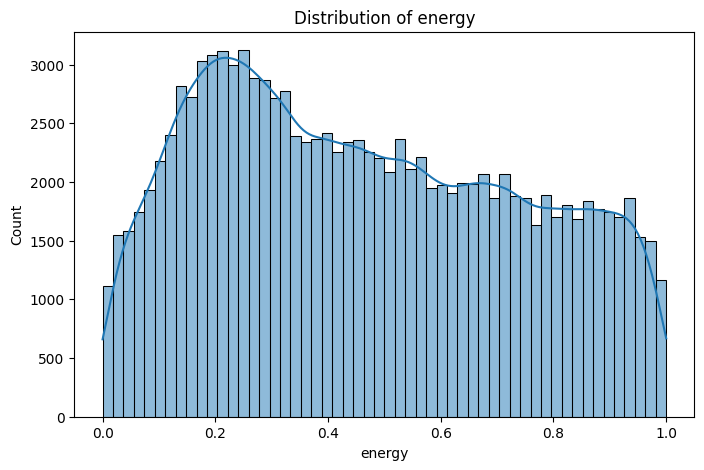

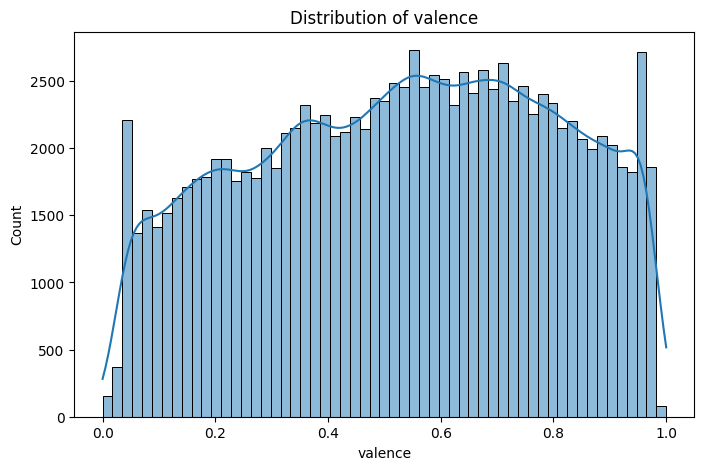

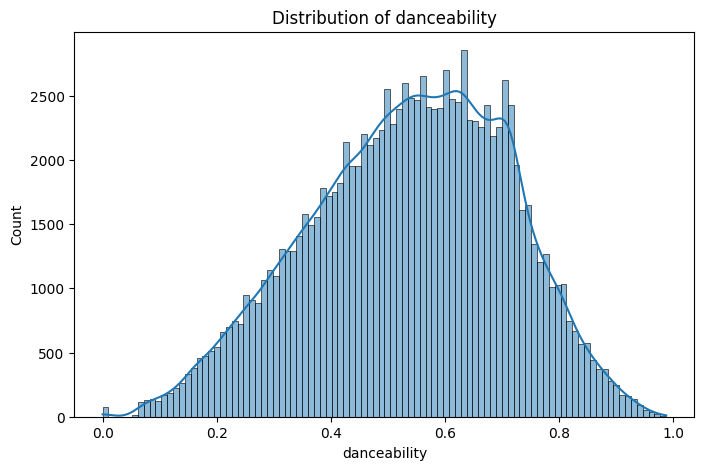

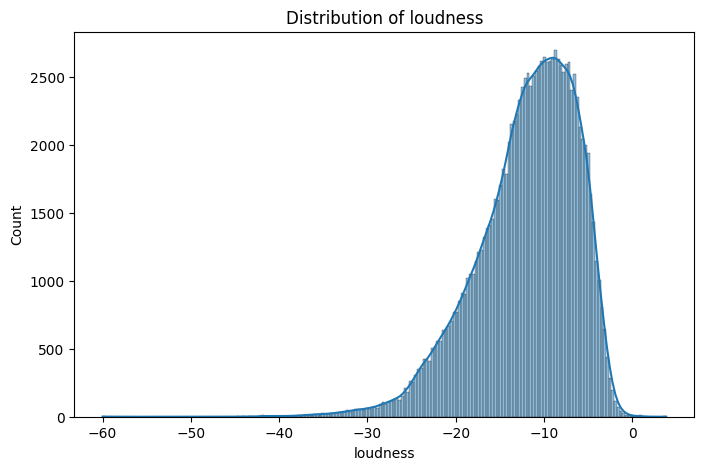

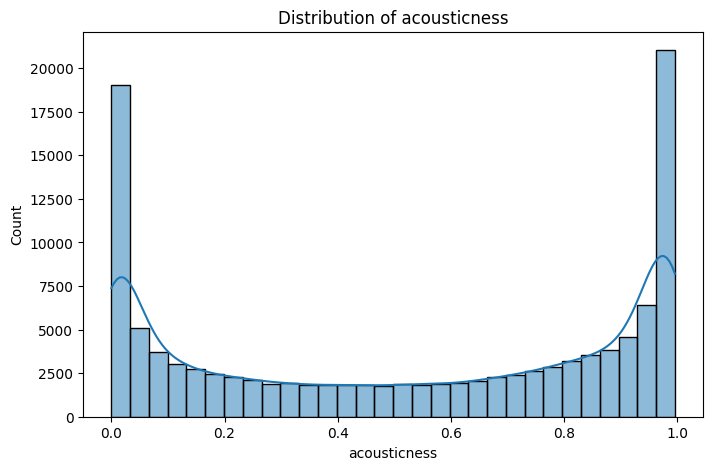

In [ ]:
for feature in features:
  plt.figure(figsize=(8,5))
  sns.histplot(data=spotify_data[feature],kde=True)
  plt.title(f'Distribution of {feature}')
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

features=['energy','valence','danceability','loudness','acousticness']
x=spotify_data[features]
y=spotify_data['popularity']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20,30,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf=GridSearchCV(RandomForestRegressor(random_state=42),param_grid,refit=True,verbose=2,cv=5)
grid_search_rf.fit(x_train_scaled,y_train)
best_param_rf=grid_search_rf.best_parameter_
best_model_rf=grid_search_rf.best_estimator_
y_pred_best_rf=best_model_rf.predict(x_test_scaled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

KeyboardInterrupt: 

In [ ]:
y_pred_best_rf=best_model_rf.predict(x_test_scaled)
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_best_rf,alpha=0.7)
plt.plot([max(y_test),max(y_test)],[min(y_test),min(y_test)],color='red',linewidth=2)
plt.title('actual vsPopularity')
plt.xlabel('actual Popularity')
plt.ylabel('predicted Popularity')
plt.show()